# Chatbot programmieren

| Sätze | Labels | Antwort |
|-------|--------|---------|
| Hallo | Begrüßung | Hallo! Wie kann ich Ihnen helfen? |
| Tschüss | Verabschiedung | Auf Wiedersehen! |
| Danke | Dank | Gern geschehen! |

Chatbot erkennt label eines vom User eingegebenen Satzes und sucht dann eien zufällige Antwort aus dem jeweiligen Label.

Mit Machinen Learning (Klassifizuerungsalgorithmus) soll ein unbekannter Satz nach dem Training in eine der verfügbaren Kategorien (Labels) eingeteilt werden.


1. Machine Learning
- Installiere pandas und scikit-learn        
- Jeder Satz im Datensatz wird in ein Bag of Words verwandelt
- Der ML Algorithmus wird mit den Daten im BoW Format und den dazugehörigen Labels trainiert.
- Teste den Algorithmus indem du über die input-Funktion im Terminal einen Satz eingibst, dieser in ein Bow verwandelt und dann kategorisiert mit dem ML Algorithmus.

2. Chatbot
- Ein Satz aus dem Terminal User Input wird kategorisiert.
- Aus der responses Spalte wird eine zufällige Antwort mit der passenden Kategorie ausgewählt und ausgegeben.

Imports:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier


Functions:

In [4]:
def bow(vocabulary:list, sentence:str, )-> list:
    '''Generates a bow-array:list[int] for a given sentence:str based on a given vocabulary:list[str] '''
    bagOfWords = []
    for word in vocabulary:
        if word in sentence.lower():
            bagOfWords.append(1)
        else:
            bagOfWords.append(0)
    return bagOfWords

def bow_list(vocabulary:list, sentences:list[str])->list[int]:
    ''' Generates a list of bow-arrays for list of sentences based on a given vocabulary:list[str] '''
    bow_list:list[int] = []
    for sentence in sentences:
        bow_list.append(bow(vocabulary, sentence))
    return bow_list

def remove_chars(chars, sentences):
    ''' Removes chars from sentences:list[str] and return "cleaned" sentences '''
    clean_sentences = []
    for sentence in sentences:
        for char in chars:
            if char in sentence:
                sentence = sentence.replace(char, '')
        sentence = sentence.strip().lower()
        clean_sentences.append(sentence)
    return clean_sentences

def create_vocabulary(sentences):
    ''' Creates array of words (vocabulary) based on given sentences '''
    words_list = []
    for sentence in sentences:
        words = sentence.split(" ")
        for word in words:
            words_list.append(word)
    vocabulary = list(set(words_list))
    # vocabulary = words_list
    return vocabulary

Read CSV-Training data

In [5]:
df = pd.read_csv('ChatbotTraining.csv',
                sep=',',              # Specify separator (default is comma)
                encoding='utf-8',     # Specify encoding
                header=0)
print(df['tag'].shape)
print(df['patterns'].shape)

(210,)
(210,)


Input data: Preparation and cleaning

(210, 331) [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


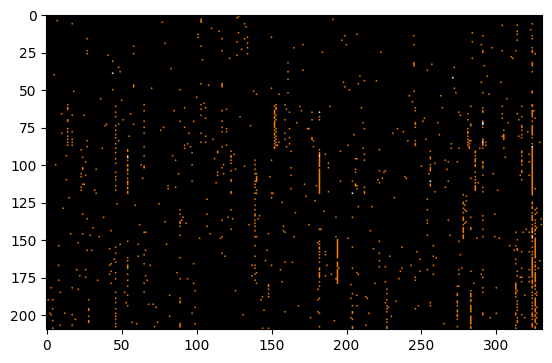

In [ ]:
# input data
sentences = df['patterns'].values.tolist()
# remove chars from sentences
chars = '!?.\','
sentences = remove_chars(chars, sentences)


count_vec = CountVectorizer()
word_counts = count_vec.fit_transform(sentences,)
print(word_counts.shape, word_counts.toarray())
plt.imshow(word_counts.toarray(), 'afmhot')

Data model: Using Bag of Words as Vocabulary

(210, 334)


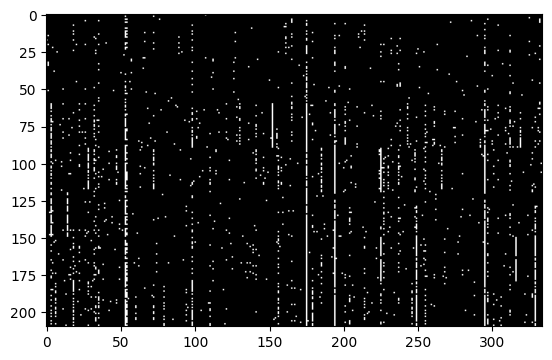

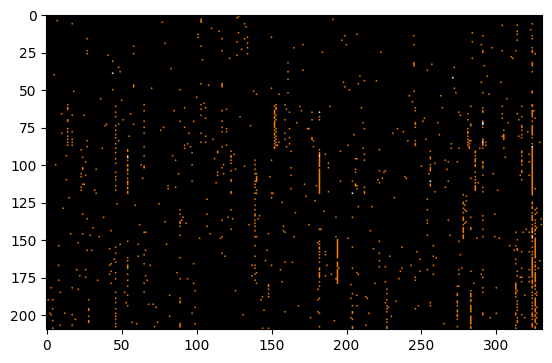

In [9]:
vocabulary = create_vocabulary(sentences)
X_train = bow_list(vocabulary, sentences)

X_matrix = np.array(X_train)
print(X_matrix.shape)
plt.imshow(X_matrix, 'afmhot')
plt.show()
plt.imshow(word_counts.toarray(), 'afmhot')

Labels / output data:

In [7]:
# labels / output data
labels = df['tag'].values.tolist()
le = LabelEncoder()
y = le.fit_transform(labels)
print(f"Labels: {y}")

Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


Model training:

In [10]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train,y)

DecisionTreeClassifier()

Genauigkeit der Traningsdaten: Wie gut bildet das Modell die Trainingsdaten ab?

In [14]:
from sklearn.metrics import accuracy_score
X_test = X_train

y_predict = decisionTree.predict(X_test)
tag_predict = le.inverse_transform(y_predict)
print(f"Predicted tags: {tag_predict}")
accuracy = accuracy_score(y, tag_predict)
print(f"Accuracy: {accuracy * 100:.2f}%")

Predicted tags: ['greeting' 'greeting' 'greeting' 'greeting' 'greeting' 'greeting'
 'greeting' 'greeting' 'greeting' 'greeting' 'greeting' 'greeting'
 'greeting' 'greeting' 'greeting' 'greeting' 'greeting' 'greeting'
 'greeting' 'greeting' 'greeting' 'greeting' 'greeting' 'greeting'
 'greeting' 'greeting' 'greeting' 'greeting' 'greeting' 'greeting'
 'goodbye' 'goodbye' 'goodbye' 'goodbye' 'goodbye' 'goodbye' 'goodbye'
 'goodbye' 'goodbye' 'goodbye' 'goodbye' 'goodbye' 'goodbye' 'goodbye'
 'goodbye' 'goodbye' 'goodbye' 'goodbye' 'goodbye' 'goodbye' 'goodbye'
 'goodbye' 'goodbye' 'goodbye' 'goodbye' 'goodbye' 'goodbye' 'goodbye'
 'goodbye' 'goodbye' 'joke' 'joke' 'joke' 'joke' 'joke' 'joke' 'joke'
 'joke' 'joke' 'joke' 'joke' 'joke' 'joke' 'joke' 'joke' 'joke' 'joke'
 'joke' 'joke' 'joke' 'joke' 'joke' 'joke' 'joke' 'joke' 'joke' 'joke'
 'joke' 'joke' 'joke' 'help' 'help' 'help' 'help' 'help' 'help' 'help'
 'help' 'help' 'help' 'help' 'help' 'help' 'help' 'help' 'help' 'help'
 'help' 'he

Anwendung:

In [ ]:
while True:
    userInput = input("Please enter a sentence [q: Exit]: ").lower()
    if userInput == "q":
        break
    userInput = [bow(vocabulary, userInput)]
    print(userInput)
    y_predict = decisionTree.predict(X_test)
    tag_predict = le.inverse_transform(y_predict)
    print(tag_predict)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,